In [183]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from gpt3forchem.data import get_waterstability_data
from glob import glob 
from fastcore.helpers import load_pickle
import dabest
import numpy as np
import matplotlib as mpl
from pycm import ConfusionMatrix, Compare

from collections import Counter
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])
%matplotlib inline

In [144]:
input_data = get_waterstability_data()

In [145]:
Counter(input_data['stability'])

Counter({'high': 146, 'low': 42})

In [146]:
all_files = glob('results/20221204-water-stability_downsampled_5/*.pkl')

In [167]:
all_results = []

weighted_cms = []
unweighted_cms = []
high_confidence_cms = []
confidence_cms = []
for f in all_files:
    r  = load_pickle(f)
    res = {
        'with_confidence': r['with_confidence'],
        'acc': r['cm'].ACC_Macro,
        'mcc': r['cm'].Overall_MCC,
        "fnr_macro": r['cm'].FNR_Macro,
        "fpr_macro": r['cm'].FPR_Macro,
        "kappa": r['cm'].Kappa,
        'seed': f.split('/')[-1].split('_')[0],
        'f1_macro': r['cm'].F1_Macro,
        'f1_micro': r['cm'].F1_Micro,
        'f1_0': r['cm'].F1[0],
        'f1_1': r['cm'].F1[1],
        'cm': r['cm'],
        'confidence_acc': r['confidence_cm'].ACC_Macro if r['confidence_cm'] else None,
        'confidence_f1_macro': r['confidence_cm'].F1_Macro if r['confidence_cm'] else None,
        'confidence_f1_micro': r['confidence_cm'].F1_Micro if r['confidence_cm'] else None,
        'high_confidence_acc': r['high_confidence_cm'].ACC_Macro if r['high_confidence_cm'] else None,
        'high_confidence_f1_macro': r['high_confidence_cm'].F1_Macro if r['high_confidence_cm'] else None,
        'high_confidence_f1_micro': r['high_confidence_cm'].F1_Micro if r['high_confidence_cm'] else None,
        "downsample_fraction": r["downsample_fraction"]
    }
    if r['with_confidence']:
        if r['cm'].to_array().shape == (2,2) and r['downsample_fraction'] == 1.0:
            weighted_cms.append(r['cm'].to_array())
            high_confidence_cms.append(r['high_confidence_cm'])
            confidence_cms.append(r['confidence_cm'])
    else:
        if r['cm'].to_array().shape == (2,2) and r['downsample_fraction'] == 1.0:
            unweighted_cms.append(r['cm'].to_array())
    all_results.append(res)

In [175]:
print(confidence_cms[1].relabel({"low": 0, "medium":1, "high": 2}))

None


In [176]:
print(confidence_cms[1])

Predict  0        1        2        
Actual
0        17       0        4        

1        5        1        1        

2        2        0        8        





Overall Statistics : 

95% CI                                                            (0.53642,0.832)
ACC Macro                                                         0.78947
ARI                                                               0.23872
AUNP                                                              0.70483
AUNU                                                              0.69367
Bangdiwala B                                                      0.55226
Bennett S                                                         0.52632
CBA                                                               0.48886
CSI                                                               0.3587
Chi-Squared                                                       16.85873
Chi-Squared DF                                                    4

In [158]:
print(unweighted_cms[1])

[[ 4  4]
 [ 2 28]]


In [159]:
print(weighted_cms[1])

[[ 5  3]
 [ 4 26]]


In [161]:
cm_weighted = ConfusionMatrix(matrix =np.sum(np.array(weighted_cms), axis=0))

In [162]:
cm_unweighted = ConfusionMatrix(matrix =np.sum(np.array(unweighted_cms), axis=0))

In [180]:
cm_high_confidence = ConfusionMatrix(matrix =np.sum(np.array([cm.to_array() for cm in high_confidence_cms]), axis=0))

In [181]:
print(cm_high_confidence)

Predict   0         1         
Actual
0         60        27        

1         47        160       





Overall Statistics : 

95% CI                                                            (0.69869,0.79791)
ACC Macro                                                         0.7483
ARI                                                               0.23516
AUNP                                                              0.7313
AUNU                                                              0.7313
Bangdiwala B                                                      0.60811
Bennett S                                                         0.4966
CBA                                                               0.66685
CSI                                                               0.43948
Chi-Squared                                                       56.6274
Chi-Squared DF                                                    1
Conditional Entropy                                      

In [185]:
print(cm_unweighted)

Predict   0         1         
Actual
0         42        30        

1         25        245       





Overall Statistics : 

95% CI                                                            (0.80025,0.87812)
ACC Macro                                                         0.83918
ARI                                                               0.38291
AUNP                                                              0.74537
AUNU                                                              0.74537
Bangdiwala B                                                      0.78141
Bennett S                                                         0.67836
CBA                                                               0.73712
CSI                                                               0.50426
Chi-Squared                                                       86.89986
Chi-Squared DF                                                    1
Conditional Entropy                                 

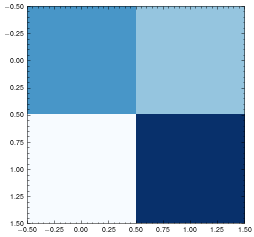

In [164]:
plt.imshow(cm_unweighted.to_array(normalized=True), cmap='Blues')

<AxesSubplot:>

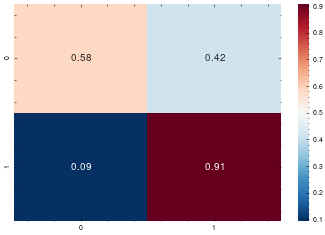

In [165]:
sns.heatmap(cm_unweighted.to_array(normalized=True), cmap='RdBu_r', annot=True, fmt='.2f')

<AxesSubplot:>

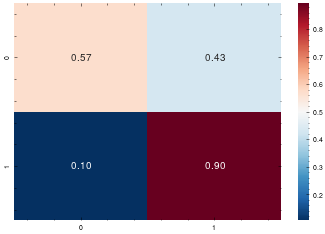

In [166]:
sns.heatmap(cm_weighted.to_array(normalized=True), cmap='RdBu_r', annot=True, fmt='.2f')

<AxesSubplot:>

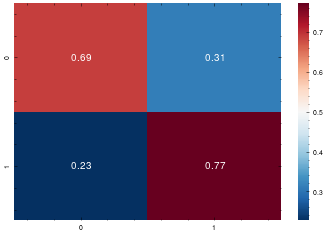

In [182]:
sns.heatmap(cm_high_confidence.to_array(normalized=True), cmap='RdBu_r', annot=True, fmt='.2f')

In [186]:
print(confidence_cms[0])

Predict  0        1        2        
Actual
0        14       0        7        

1        4        1        2        

2        1        0        9        





Overall Statistics : 

95% CI                                                            (0.47821,0.78495)
ACC Macro                                                         0.75439
ARI                                                               0.16086
AUNP                                                              0.69223
AUNU                                                              0.68233
Bangdiwala B                                                      0.4744
Bennett S                                                         0.44737
CBA                                                               0.43651
CSI                                                               0.31546
Chi-Squared                                                       14.09894
Chi-Squared DF                                                   

In [134]:
all_results = pd.DataFrame(all_results)

In [88]:
all_results.groupby(['with_confidence', 'downsample_fraction']).agg(['mean', 'std'])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_22713/1657876067.py:1: FutureWarning: ['fnr_macro', 'seed', 'cm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  all_results.groupby(['with_confidence', 'downsample_fraction']).agg(['mean', 'std'])


acc                 mcc            \
                                         mean       std      mean       std   
with_confidence downsample_fraction                                           
False           0.6                  0.868421  0.026316  0.540556  0.138746   
                0.8                  0.848684  0.025195  0.479475  0.113884   
                1.0                  0.839181  0.033403  0.511980  0.095903   
True            0.3                  0.671053  0.018608  0.330987  0.079637   
                0.6                  0.798246  0.092418  0.423531  0.217886   
                0.8                  0.789474  0.037216  0.276385  0.135027   
                1.0                  0.828739  0.029043  0.466060  0.092897   

                                    fpr_macro               kappa            \
                                         mean       std      mean       std   
with_confidence downsample_fraction                                           
False           0.6                  0.250609  0.061589  0.493801  0.114961   
                0.8                  0.347917  0.041458  0.399720  0.103514   
                1.0                  0.254630  0.033167  0.506482  0.087743   
True            0.3                  0.300000  0.053033  0.285346  0.043054   
                0.6                  0.311111  0.058531  0.404448  0.191719   
                0.8                  0.385417  0.055979  0.265700  0.129807   
                1.0                  0.266225  0.049000  0.463912  0.094305   

                                     f1_macro            ...  \
                                         mean       std  ...   
with_confidence downsample_fraction                      ...   
False           0.6                  0.667412  0.177789  ...   
                0.8                  0.687762  0.054783  ...   
                1.0                  0.752682  0.043586  ...   
True            0.3                  0.621384  0.007385  ...   
                0.6                  0.699817  0.095102  ...   
                0.8                  0.628816  0.065617  ...   
                1.0                  0.721078  0.075060  ...   

                                    confidence_f1_macro            \
                                                   mean       std   
with_confidence downsample_fraction                                 
False           0.6                                 NaN       NaN   
                0.8                                 NaN       NaN   
                1.0                                 NaN       NaN   
True            0.3                            0.396662  0.037181   
                0.6                            0.542132  0.031648   
                0.8                            0.589208  0.062921   
                1.0                            0.552947  0.047913   

                                    confidence_f1_micro            \
                                                   mean       std   
with_confidence downsample_fraction                                 
False           0.6                                 NaN       NaN   
                0.8                                 NaN       NaN   
                1.0                                 NaN       NaN   
True            0.3                            0.539474  0.093040   
                0.6                            0.587719  0.015193   
                0.8                            0.618421  0.055824   
                1.0                            0.649123  0.050161   

                                    high_confidence_acc            \
                                                   mean       std   
with_confidence downsample_fraction                                 
False           0.6                                 NaN       NaN   
                0.8                                 NaN       NaN   
                1.0                                 NaN       NaN   
True            0.3    

In [89]:
all_results[all_results['with_confidence']].agg(['mean', 'std'])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_22713/1791100688.py:1: FutureWarning: ['fnr_macro', 'seed', 'cm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  all_results[all_results['with_confidence']].agg(['mean', 'std'])


,with_confidence,acc,mcc,fpr_macro,kappa,f1_macro,f1_micro,f1_0,f1_1,confidence_acc,confidence_f1_macro,confidence_f1_micro,high_confidence_acc,high_confidence_f1_macro,high_confidence_f1_micro,downsample_fraction
mean,1.0,0.811404,0.438307,0.281960,0.430628,0.705089,0.809211,0.549226,0.877485,0.755013,0.543215,0.632519,0.732629,0.699797,0.732629,0.892857
std,0.0,0.055401,0.119323,0.057935,0.120496,0.078464,0.053896,0.095564,0.042440,0.038932,0.061595,0.058399,0.113283,0.115300,0.113283,0.212444


In [142]:
print(all_results[~all_results['with_confidence']].groupby('downsample_fraction').agg(['mean', 'std'])[['acc', 'f1_macro', 'f1_micro']].round(2).to_latex(    ))

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{acc} & \multicolumn{2}{l}{f1\_macro} & \multicolumn{2}{l}{f1\_micro} \\
{} &  mean &   std &     mean &   std &     mean &   std \\
downsample\_fraction &       &       &          &       &          &       \\
\midrule
0.6                 &  0.87 &  0.03 &     0.67 &  0.18 &     0.84 &  0.07 \\
0.8                 &  0.85 &  0.03 &     0.69 &  0.05 &     0.85 &  0.03 \\
1.0                 &  0.84 &  0.03 &     0.75 &  0.04 &     0.84 &  0.03 \\
\bottomrule
\end{tabular}



/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_22713/2247944159.py:1: FutureWarning: ['fnr_macro', 'seed', 'cm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(all_results[~all_results['with_confidence']].groupby('downsample_fraction').agg(['mean', 'std'])[['acc', 'f1_macro', 'f1_micro']].round(2).to_latex(    ))
/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_22713/2247944159.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_results[~all_results['with_confidence']].groupby('downsample_fraction').agg(['mean', 'std'])[['acc', 'f1_macro', 'f1_micro']].round(2).to_latex(    ))


In [15]:
all_results = all_results.sort_values(by='seed')

In [16]:
dabest_results = dabest.load(pd.DataFrame(
    {
        'id': all_results['seed'],
        'with confidence': all_results[all_results['with_confidence']]['f1_macro'],
        'without confidence': all_results[~all_results['with_confidence']]['f1_macro']
    }
), idx=("with confidence", "without confidence",), id_col='id', paired=True)

In [17]:
dabest_results.mean_diff.plot()

ValueError: The two arrays supplied do not have the same length.

In [18]:
dabest_results.mean_diff

ValueError: The two arrays supplied do not have the same length.